## This part is to explore the arima model.

In [1]:
import pickle
saveddata = open('.\Dataset_B03_10mins.pkl', 'rb')

data2 = pickle.load(saveddata)

from statsmodels.tsa.stattools import adfuller
from numpy import log

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
dataprice = {'Close':data2}

In [3]:
import pandas as pd
data = pd.DataFrame(dataprice)

In [4]:
result = adfuller(data.Close)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.352129
p-value: 0.155706


Since P-value is greater than the significance level, let’s difference the series and see how the autocorrelation plot looks like.

In [5]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

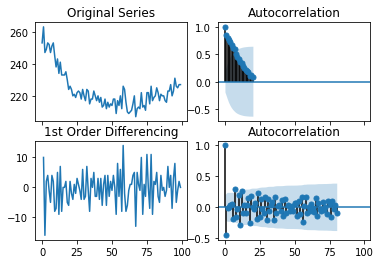

In [6]:
# Original Series
fig, axes = plt.subplots(2, 2, sharex=True)
axes[0, 0].plot(data.Close[:100]), axes[0, 0].set_title('Original Series')
plot_acf(data.Close[:100], ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(data.Close[:100].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(data.Close[:100].diff().dropna(), ax=axes[1, 1],lags =80)

plt.show()

In [7]:
result = adfuller(data.Close.diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -15.366309
p-value: 0.000000


After one diff, the p-value is good. So d ===1

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


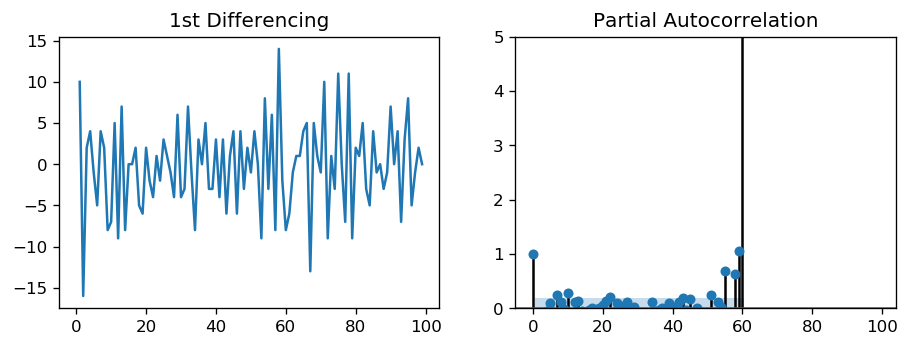

In [8]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(data.Close[:100].diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(data.Close[:100].diff().dropna(), ax=axes[1],lags =60)

plt.show()

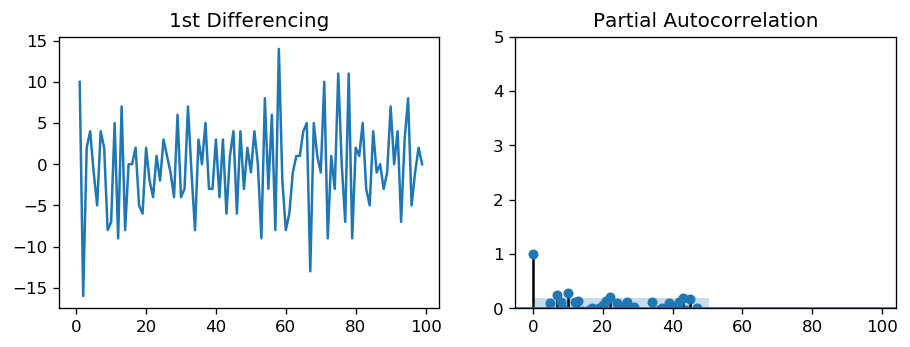

In [9]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(data.Close[:100].diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(data.Close[:100].diff().dropna(), ax=axes[1],lags =50)

plt.show()

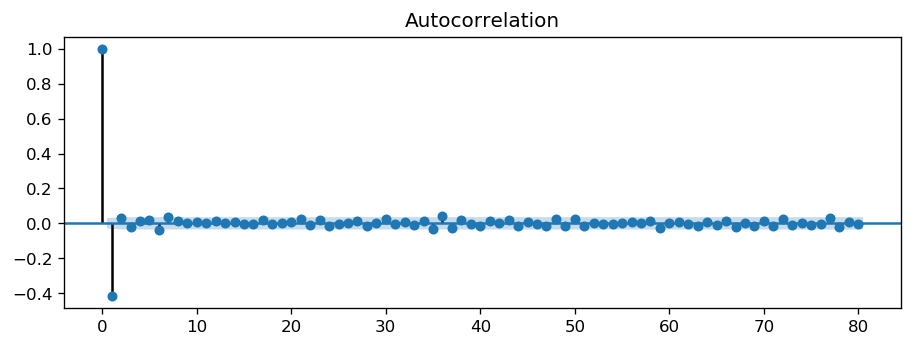

In [10]:
# fig, axes = plt.subplots(1, 2, sharex=True)
# axes[0].plot(df.value.diff()); axes[0].set_title('1st Differencing')
# axes[1].set(ylim=(0,1.2))
plot_acf(data.Close.diff().dropna(), lags =80)

plt.show()

In [11]:
# The result shows that  q ==2, but p is not clear first try  112
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(data.Close, order=(1,1,2))
model_fit = model.fit(disp =0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 4181
Model:                 ARIMA(1, 1, 2)   Log Likelihood              -12460.678
Method:                       css-mle   S.D. of innovations              4.765
Date:                Tue, 11 May 2021   AIC                          24931.355
Time:                        21:48:22   BIC                          24963.047
Sample:                             1   HQIC                         24942.564
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0071      0.038     -0.185      0.853      -0.082       0.068
ar.L1.D.Close    -0.3853      0.340     -1.134      0.257      -1.051       0.281
ma.L1.D.Close    -0.1226      0.342     

In [12]:
from statsmodels.tsa.arima_model import ARIMA

# 2,1,2 ARIMA Model
model = ARIMA(data.Close, order=(2,1,2))
model_fit = model.fit(disp =0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 4181
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -12460.667
Method:                       css-mle   S.D. of innovations              4.765
Date:                Tue, 11 May 2021   AIC                          24933.335
Time:                        21:48:29   BIC                          24971.365
Sample:                             1   HQIC                         24946.785
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0071      0.038     -0.185      0.853      -0.082       0.068
ar.L1.D.Close    -0.4358      0.487     -0.895      0.371      -1.390       0.519
ar.L2.D.Close    -0.0060      0.044     

In [13]:
model = ARIMA(data.Close, order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 4181
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -12460.849
Method:                       css-mle   S.D. of innovations              4.765
Date:                Tue, 11 May 2021   AIC                          24929.699
Time:                        21:48:41   BIC                          24955.052
Sample:                             1   HQIC                         24938.666
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0071      0.038     -0.184      0.854      -0.082       0.068
ar.L1.D.Close    -0.0587      0.030     -1.931      0.054      -0.118       0.001
ma.L1.D.Close    -0.4498      0.027    -

### The  model with order(1,1,1) has the lowest AIC, so we decide 111

In [14]:
from statsmodels.tsa.arima_model import ARIMA

# 2,1,2 ARIMA Model
model = ARIMA(data.Close, order=(1,1,1))
model_fit = model.fit(disp =0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 4181
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -12460.849
Method:                       css-mle   S.D. of innovations              4.765
Date:                Tue, 11 May 2021   AIC                          24929.699
Time:                        21:49:39   BIC                          24955.052
Sample:                             1   HQIC                         24938.666
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0071      0.038     -0.184      0.854      -0.082       0.068
ar.L1.D.Close    -0.0587      0.030     -1.931      0.054      -0.118       0.001
ma.L1.D.Close    -0.4498      0.027    -

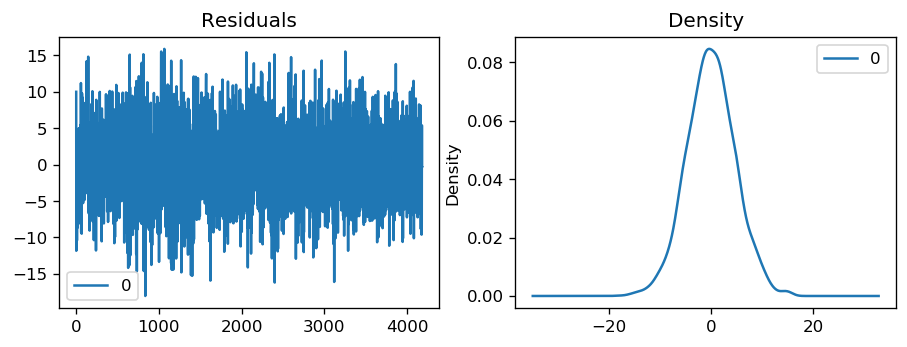

In [15]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

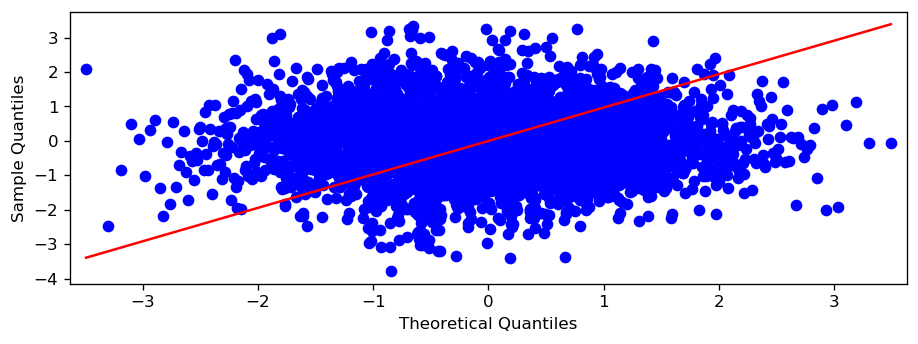

In [16]:
resid = residuals

from statsmodels.graphics.api import qqplot

qqplot(resid, line='q', fit=True)

plt.show()

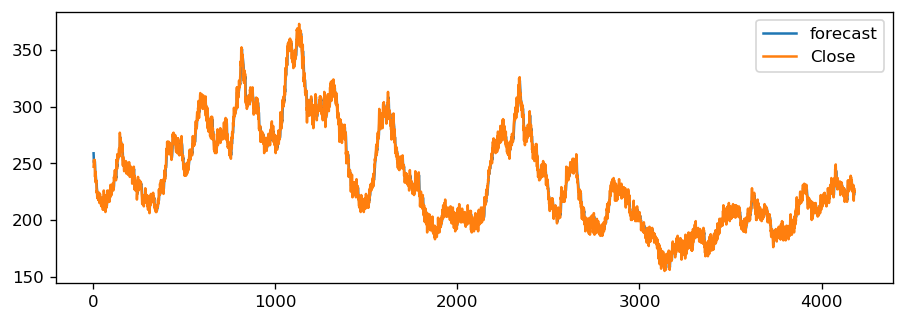

In [17]:
# plot the prediction
model_fit.plot_predict(dynamic=False)
plt.show()

(0, 200)

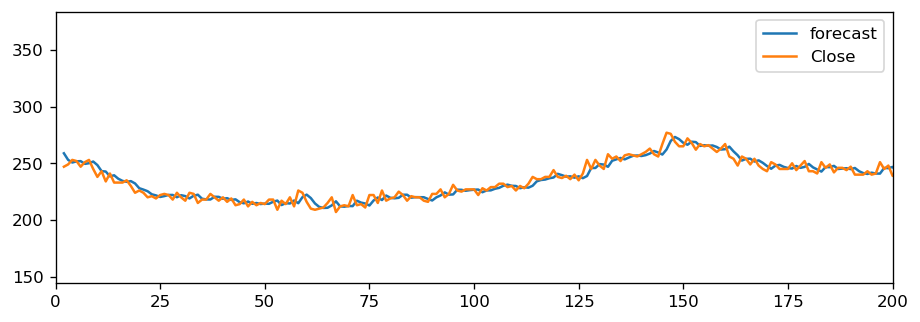

In [18]:
# see in a smaller range
model_fit.plot_predict(dynamic=False)
plt.xlim(0,200)

In [19]:
pred = model_fit.predict(dynamic =False,typ ='levels')

In [20]:
pred_d = model_fit.predict(dynamic =False)
pred_list =list(pred_d)
# insert two values
pred_list.insert(0,0)
pred_list.insert(0,0)
pred_list

[0,
 0,
 -4.168180432864418,
 6.04033118975828,
 1.6779781209810256,
 -1.28492378460564,
 -0.07693138527603871,
 2.500160483359282,
 -0.91678234142789,
 -1.436810214766072,
 3.4140517607729546,
 5.087546076248067,
 -0.2614348970208713,
 4.451228326784134,
 -1.5646139457608772,
 3.3565658519432215,
 1.5023417833616945,
 0.6682912929059925,
 -0.723830131245407,
 2.2093252742159173,
 4.037169156345688,
 0.7915283855974287,
 1.3655158566676757,
 2.6406580588656308,
 0.6718403962013797,
 1.3116788754985174,
 -0.9429054270691952,
 -0.9400860876863916,
 0.078138372762802,
 2.0615814304727262,
 -2.1310254008642446,
 1.067875135626398,
 1.9982978259490398,
 -2.6679692111933826,
 -0.699082563541352,
 3.745891439461214,
 0.15203030231422104,
 0.060906256664096325,
 -2.5224730727858042,
 0.3833194988638371,
 1.6903771305509567,
 -0.7725627642094435,
 1.678926651803084,
 -0.7777133161724077,
 2.6935661669919595,
 0.6956390483072958,
 -1.7284850988665816,
 2.26589850527112,
 -1.0221650308142836,
 1.

In [21]:
pred_2= [round(i,2) for i in pred_list]

In [22]:
data['pred_d'] =pred_2

In [23]:
data.head()

,Close,pred_d
0,253,0.00
1,263,0.00
2,247,-4.17
3,249,6.04
4,253,1.68


In [24]:
def trading(df,initial_money =1000, buy_diff = 1, sell_diff = -1):
    hold = 0
    money = initial_money
    money_memory =[money]
    for i in range(1,df.shape[0]):
        if df.pred_d[i] > buy_diff and hold ==0:
            buyprice = df.Close[i-1]
            print('{}mins，buy at {}'.format(i*10, buyprice))
            hold = 1
        if hold ==1 and df.pred_d[i] < sell_diff:
            sellprice = df.Close[i-1]
            money = money*(sellprice/buyprice)
            print('{}mins, sell at {}，total_gain:{}'.format(i*10, sellprice,(money - initial_money)))
            hold = 0
        money_memory.append(money)
    return money_memory

In [25]:
result =trading(data)

30mins，buy at 247
50mins, sell at 253，total_gain:24.29149797570858
70mins，buy at 247
90mins, sell at 253，total_gain:49.173072825321015
100mins，buy at 245
140mins, sell at 241，total_gain:32.0437165342953
150mins，buy at 233
300mins, sell at 224，total_gain:-7.820633031407056
310mins，buy at 220
330mins, sell at 224，total_gain:10.218991822567205
350mins，buy at 215
380mins, sell at 223，total_gain:47.808535704337146
400mins，buy at 217
460mins, sell at 218，total_gain:52.63714646795165
470mins，buy at 212
480mins, sell at 216，total_gain:72.498224703196
490mins，buy at 213
520mins, sell at 218，total_gain:97.67423936759019
540mins，buy at 209
550mins, sell at 217，total_gain:139.69047819505772
580mins，buy at 212
590mins, sell at 226，total_gain:214.95305694378817
610mins，buy at 216
660mins, sell at 215，total_gain:209.3282742727522
680mins，buy at 207
720mins, sell at 222，total_gain:296.96075791570547
730mins，buy at 213
760mins, sell at 222，total_gain:351.7619167008761
780mins，buy at 215
790mins, sell a

41130mins，buy at 229
41220mins, sell at 225，total_gain:11226856437.19441
41260mins，buy at 224
41310mins, sell at 221，total_gain:11076496739.374844
41370mins，buy at 217
41420mins, sell at 224，total_gain:11433803118.064354
41470mins，buy at 229
41500mins, sell at 229，total_gain:11433803118.064354
41560mins，buy at 230
41600mins, sell at 232，total_gain:11533227501.699696
41620mins，buy at 232
41630mins, sell at 238，total_gain:11831500652.605724
41640mins，buy at 233
41750mins, sell at 231，total_gain:11729942698.506105
41760mins，buy at 219
41770mins, sell at 229，total_gain:12265556566.017801
41780mins，buy at 217
41790mins, sell at 224，total_gain:12661219713.308699


Text(0, 0.5, 'total_money')

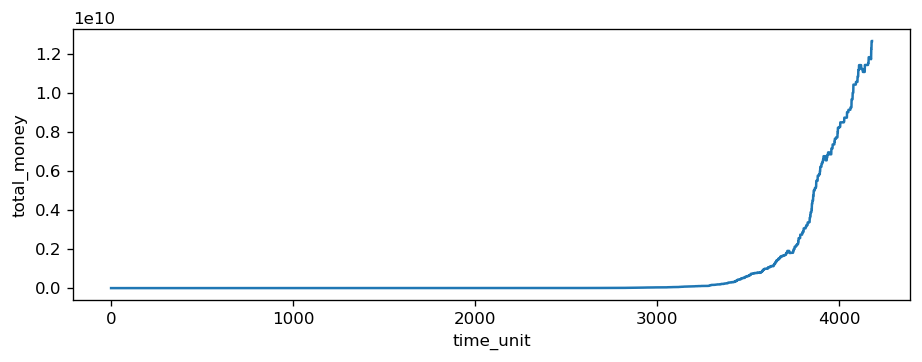

In [26]:
plt.plot(result)
plt.xlabel("time_unit")
plt.ylabel("total_money")

### The result is so great, it has a quite good performance.